# 4.5 Aufgaben - Lösungen

## Aufgabe 1: Fibonacci-Algorithmus

Implementiere eine Funktion, die die n-te Fibonacci-Zahl rekursiv berechnet.<br>
Erinnerung: <br>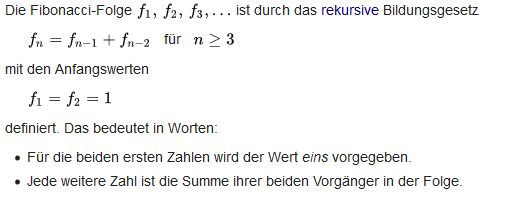

In [1]:
def fib(n):
    if n<0:
        return "Falsche Eingabe"
    elif n==1 or n==0:
        return 1
    else:
        return fib(n-2)+fib(n-1)
    
print(fib(3))

3


## Aufgabe 2: Pascalsches Dreieck

Ziel dieser Aufgabe ist es, den Binomialkoeffizienten iterativ und rekursiv zu berechen. Dafür folgende Erklärung:

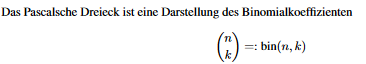

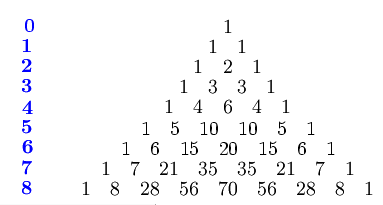

Die Zahl 5 aus der 5. Zeile, 2. Eintrag, ist der Wert von binomial(5,1). Dieser berechnet sich aus<br>

\begin{equation*}
binomial(4,0)+binomial(4,1) = 1+4 = 5
\end{equation*}


Allgemein gilt:<br>

\begin{equation*}
binomial(n,0) = binomial(n,n) = 1\\
binomial(n,k) = binomial(n-1,k-1) + bin(n-1,k)
\end{equation*}


Implementiere nun folgende Funktionen:
1. `def pascalschesDreieck(zeilen)`:<br>
Die Methode berechnet die ersten Zeilen des Pascalschen Dreiecks iterativ. Die erste Dimension ist das "Zeilen"-Array. Für ungültige Eingaben (`anzahlZeilen <= 0`) liefert sie `None` zurück. Dies entspricht dem Null-Objekt in Python.

2. `def binomial(n,k)`:<br>
Diese Methode soll den Wert `bin(n,k)` rekursiv nach obiger Formel berechnen.  Sind `n` oder `k` ungültig, so liefert die Methode −1 zurück, ebenso für `n < k`.<br><br>

Teste Deine Implementierung anschließend mit verschiedenen Werten.<br>
Beispielwerte: <br>
`binomial(9,2) = 36`<br>
`binomial(4,2) = 6`<br>
`binomial(20,5) = 15504`<br>
`pascalschesDreieck(13)`:

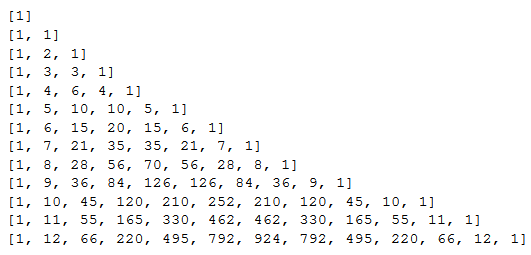

In [50]:
#1.
def pascalschesDreieck(zeilen):
    if zeilen<=0:
        return None
    liste = [[1]]
    liste_2 = []
    for i in range(0,zeilen-1):
        for j in range(0,len(liste[i])+1):
            if j >= 1 and j <= len(liste[i])-1:
                zahl = liste[i][j-1] + liste[i][j]
                liste_2.append(zahl)
            else:
                liste_2.append(1)
        liste.append(liste_2)
        liste_2 = []

    return liste

#2.
def binomial(n,k):
    if k<0 or n<k:
        return -1 
    if k==0 or k==n:
        return 1
    return binomial(n-1,k-1) + binomial(n-1,k)

In [51]:
print(binomial(9,2))
print(binomial(4,2))
print(binomial(20,5))
for i in pascalschesDreieck(13):
    print(i)

36
6
15504
[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
[1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1]
[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]


## 3. Aufgabe: Exponentialfunktion

Das folgende Programm soll näherweise die Exponentialfunktion, `exp(n)`, gemäß der Formel berechnen:

$
\begin{equation}
e^n \approx \sum_{k=0}^m \frac{n^k} {k!} 
\end{equation}
$

Hierbei gilt für die Zahl m: 
$
\begin{equation*}
\frac{n^m} {m!} < eps
\end{equation*}
$

In unserem Algorithmus wählen wir uns also ein `eps` (Epsilon), das die Genauigkeit der Approximation angibt.

Zur Berechnung werden folgende Funktionen als Hilfestellung empfohlen:
1. Schreibe einen rekursiven Algorithmus für 
$
\begin{equation*}
{n^k}
\end{equation*}
$
, oder nutze den Befehl `n**k`.
2. Nutze die Methode für die Fakultät aus diesem Kapitel.
3. def exp(n,eps)<br>
Berechnet nun die Exponentialfunktion, `exp(n)`, entweder iterativ oder rekursiv. Das Abbruchkriterium ist über `eps` definiert. Für die rekursive Berechnung wird zusätzlich noch eine Hilfmethode benötigt.

In [52]:
#1.
def power(n,k):
    if k==0:
        return 1
    elif k<0:
        return 1/power(n,-k)
    else:
        return n*power(n,k-1)

#2.
def fakultät(n):
    if n<=1:
        return 1
    else:
        return n*fakultät(n-1)
#3.1 iterativ
def exp_iterativ(n,eps): 
    result = 0
    k = 0
    term = power(n,k)/fakultät(k)
    while term>=eps:
        k += 1
        result += term
        term = power(n,k)/fakultät(k)
    return result

#3.2 rekursiv
def exp_rekursiv(n, eps):
    return hilfsfunktion(n,0,eps)

def hilfsfunktion(n,k,eps):
    term = power(n,k)/fakultät(k)
    if(term<eps):
        return term
    else:
        return term + hilfsfunktion(n,k+1,eps)

In [53]:
print(exp_rekursiv(3,0.00000001))
print(exp_iterativ(3,0.00000001))
print(exp_rekursiv(10,0.01))
print(exp_iterativ(10,0.01))

20.085536921517672
20.08553691196314
22026.464036258916
22026.460266271286
